In [5]:
import pandas as pd

In [7]:
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [8]:
df=pd.read_csv("spam.csv", encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [13]:
df.rename(columns={"v1" : "target","v2" : "Text"},inplace=True)

In [14]:
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5572, 2)

In [16]:
df.isnull().sum()#no null values

target    0
Text      0
dtype: int64

In [17]:
#remove if there are any duplicates
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(keep="first",inplace=True)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

## EDA

In [20]:
import nltk


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()

In [23]:
df["target"]=obj.fit_transform(df["target"])

In [24]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

## data is imbalanced

In [26]:
## using nltk we will split the text into words and sentences

In [27]:
def split(df):
    df["no of characters"]=df.Text.apply(len)
    df["no of words"]=df.Text.apply(lambda x : len(nltk.word_tokenize(x)))
    df["no of sentences"]=df.Text.apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
split(df)

In [29]:
df.head()

,target,Text,no of characters,no of words,no of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[["no of characters","no of words","no of sentences"]].describe()

,no of characters,no of words,no of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#ham
df[df.target==0][["no of characters","no of words","no of sentences"]].describe()

,no of characters,no of words,no of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df.target==1][["no of characters","no of words","no of sentences"]].describe()

,no of characters,no of words,no of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
#the no of characters and no of words are greather in spam mssgs compared to ham msgs

In [34]:
import seaborn as sns

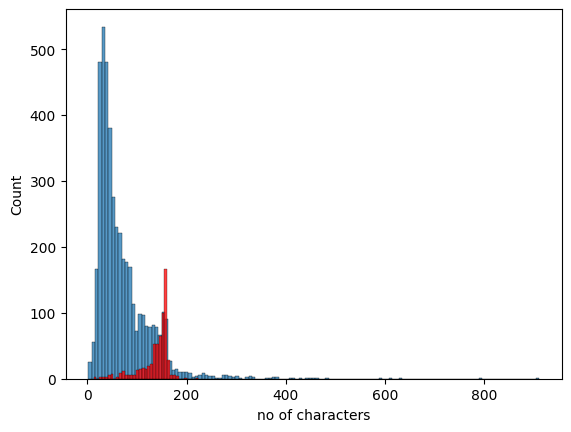

In [35]:
#we will plot histogram graph
sns.histplot(df[df.target==0]['no of characters'])
sns.histplot(df[df.target==1]['no of characters'],color='red')
plt.show()

In [36]:
## here also we can observe that no of characters in spam are high

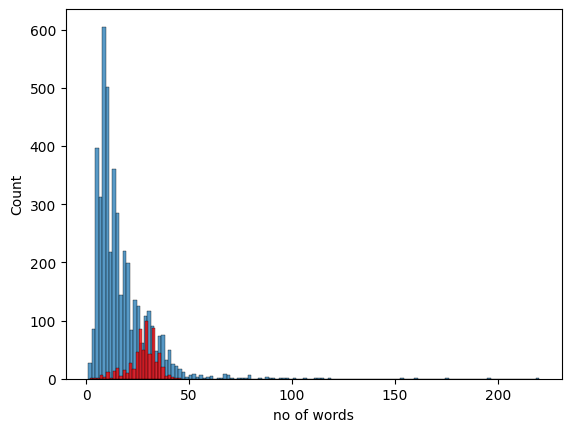

In [37]:
sns.histplot(df[df.target==0]['no of words'])
sns.histplot(df[df.target==1]['no of words'],color='red')
plt.show()

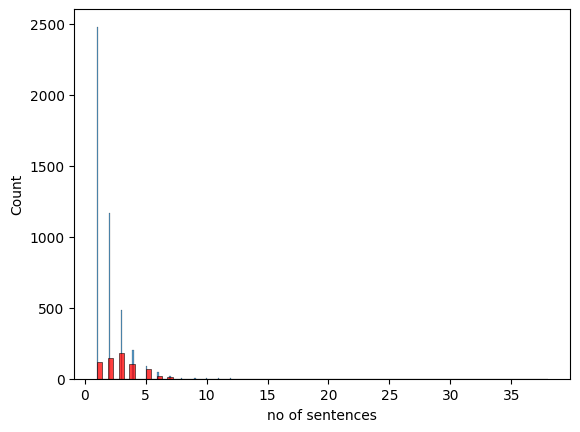

In [38]:
sns.histplot(df[df.target==0]['no of sentences'])
sns.histplot(df[df.target==1]['no of sentences'],color='red')
plt.show()

In [39]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,no of characters,no of words,no of sentences
target,1.000000,0.384717,0.262912,0.263939
no of characters,0.384717,1.000000,0.965760,0.624139
no of words,0.262912,0.965760,1.000000,0.679971
no of sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

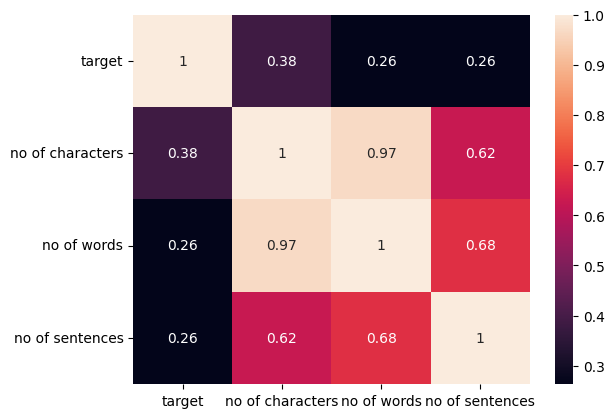

In [40]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessng
. Lower case
. Tokenization
. Removal special characters
. Removing stop words and punctuation
. Stemming

In [41]:
from nltk.corpus import stopwords


In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [45]:
def transform_text(text) :
    text=text.lower()
    text=text.split()
    y=[]
    for i in text :
        if i.isalnum() :
            y.append(i)
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text=y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))

    return " ".join(y)



In [46]:
transform_text("hi my name is harsha vardhan reddy manam & * 12")

'hi name harsha vardhan reddi manam 12'

In [47]:
df["transformed_text"]=df.Text.apply(lambda x : transform_text(x))

In [48]:
df.head()

,target,Text,no of characters,no of words,no of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


In [49]:
from sklearn.model_selection import train_test_split


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer()

In [51]:
x=tfid.fit_transform(df["transformed_text"]).toarray()

In [52]:
x.shape


(5169, 5643)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,df.target,test_size=0.2,stratify=df.target,random_state=42)

In [54]:
y_train.value_counts()

0    3613
1     522
Name: target, dtype: int64

In [55]:
y_test.value_counts()

0    903
1    131
Name: target, dtype: int64

In [56]:
#done stratified split with respective to target
3859/598


6.453177257525083

In [57]:
966/149

6.483221476510067

## model building

In [58]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [59]:
from sklearn.metrics import confusion_matrix,precision_score

In [60]:
model=MultinomialNB()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(precision_score(y_test,y_pred))


0.9584139264990329
[[902   1]
 [ 42  89]]
0.9888888888888889


<Axes: >

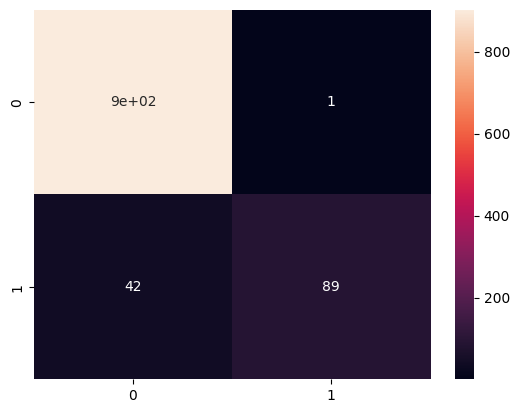

In [61]:
sns.heatmap(cm,annot=True)

In [62]:
model=BernoulliNB()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(precision_score(y_test,y_pred))

0.9738878143133463
[[901   2]
 [ 25 106]]
0.9814814814814815


<Axes: >

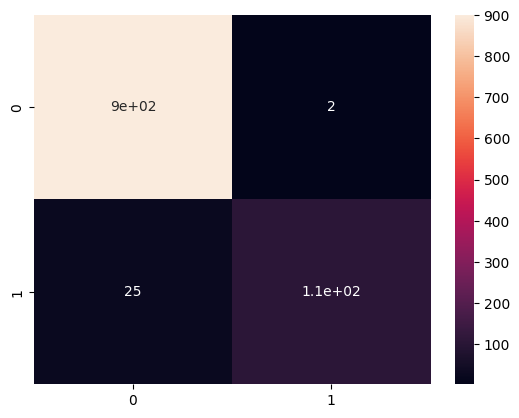

In [63]:
sns.heatmap(cm,annot=True)

## now we will use different models to check the performance

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
svc=SVC(kernel="sigmoid")
knc=KNeighborsClassifier(n_neighbors=5)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=30)

In [66]:
clfs={
    'SVC' :svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LRC' : lrc,
    "RFC" : rfc
}

In [67]:
accuracy=[]
precision=[]
model_name=[]
for name, model in clfs.items() :
    model_name.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy.append(model.score(x_test,y_test))
    precision.append(precision_score(y_test,y_pred))



In [68]:
print(accuracy)
print(precision)

[0.9671179883945842, 0.8945841392649904, 0.9584139264990329, 0.9390715667311412, 0.9410058027079303, 0.9700193423597679]
[0.9217391304347826, 1.0, 0.9888888888888889, 0.7575757575757576, 0.9605263157894737, 0.9807692307692307]


In [69]:
df1=pd.DataFrame({"Algorithms" : model_name,"accuracy" : accuracy,"precision" : precision }).sort_values('precision',ascending=False)

In [70]:
df1

,Algorithms,accuracy,precision
1,KNC,0.894584,1.000000
2,MNB,0.958414,0.988889
5,RFC,0.970019,0.980769
4,LRC,0.941006,0.960526
0,SVC,0.967118,0.921739
3,DTC,0.939072,0.757576


## model improvement
## 1) changing the max features parameter for tfid vectorizer

In [71]:
tfid=TfidfVectorizer(max_features=3000)
x=tfid.fit_transform(df["transformed_text"]).toarray()
x_train,x_test,y_train,y_test=train_test_split(x,df.target,test_size=0.2,stratify=df.target,random_state=42)

In [72]:
accuracy1=[]
precision1=[]
model_name=[]
for name, model in clfs.items() :
    model_name.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy1.append(model.score(x_test,y_test))
    precision1.append(precision_score(y_test,y_pred))

In [73]:
df2=pd.DataFrame({"Algorithms" : model_name,"accuracy_maxft_3000" : accuracy1,"precision_maxft_3000" : precision1 }).sort_values('precision_maxft_3000',ascending=False)

In [74]:
df1.merge(df2,on="Algorithms").sort_values("precision_maxft_3000",ascending=False)

,Algorithms,accuracy,precision,accuracy_maxft_3000,precision_maxft_3000
0,KNC,0.894584,1.000000,0.904255,1.000000
1,MNB,0.958414,0.988889,0.967118,0.980198
3,LRC,0.941006,0.960526,0.945841,0.974684
2,RFC,0.970019,0.980769,0.970019,0.971698
4,SVC,0.967118,0.921739,0.968085,0.915254
5,DTC,0.939072,0.757576,0.945841,0.765957


# we can see MNB has high accuracy and precision

## saving vectorizer and model

In [75]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))